# SanFrancisco Crime Date Analysis

In [17]:
import numpy as np
import pandas as pd

## Load Data

In [18]:
train = pd.read_csv("../data/train.csv")
train = train.drop(['Descript', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y'], axis=1)
train.head(3)

,Dates,Category,DayOfWeek
0,2015-05-13 23:53:00,WARRANTS,Wednesday
1,2015-05-13 23:53:00,OTHER OFFENSES,Wednesday
2,2015-05-13 23:33:00,OTHER OFFENSES,Wednesday


In [19]:
test = pd.read_csv("../data/test.csv")
test.head(3)

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212


## Data Preprocessing

In [20]:
from datetime import datetime

In [21]:
train['Year'] = pd.to_datetime(train.Dates).dt.year
train['Month'] = pd.to_datetime(train.Dates).dt.month
train['Days'] = pd.to_datetime(train.Dates).dt.day
train['Hour'] = pd.to_datetime(train.Dates).dt.hour
train['Minute'] = pd.to_datetime(train.Dates).dt.minute
train['Second'] = pd.to_datetime(train.Dates).dt.second
train.head()

,Dates,Category,DayOfWeek,Year,Month,Days,Hour,Minute,Second
0,2015-05-13 23:53:00,WARRANTS,Wednesday,2015,5,13,23,53,0
1,2015-05-13 23:53:00,OTHER OFFENSES,Wednesday,2015,5,13,23,53,0
2,2015-05-13 23:33:00,OTHER OFFENSES,Wednesday,2015,5,13,23,33,0
3,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,2015,5,13,23,30,0
4,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,2015,5,13,23,30,0


## Data Analysis - Crimes by year

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

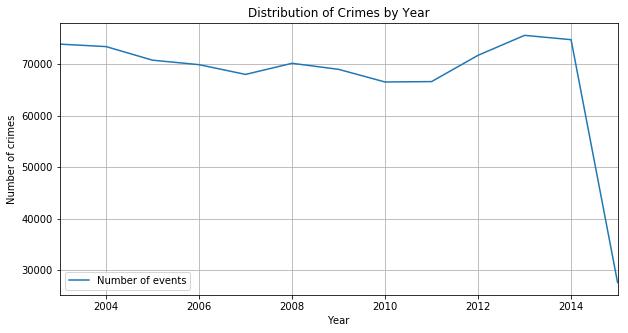

In [7]:
df = train[['Category','Year']].groupby(['Year']).count()
df.plot(y='Category', label='Number of events', figsize=(10,5)) 
plt.title("Distribution of Crimes by Year")
plt.ylabel('Number of crimes')
plt.xlabel('Year')
plt.grid(True)
plt.show()

## Data Analysis - Crimes by Hour

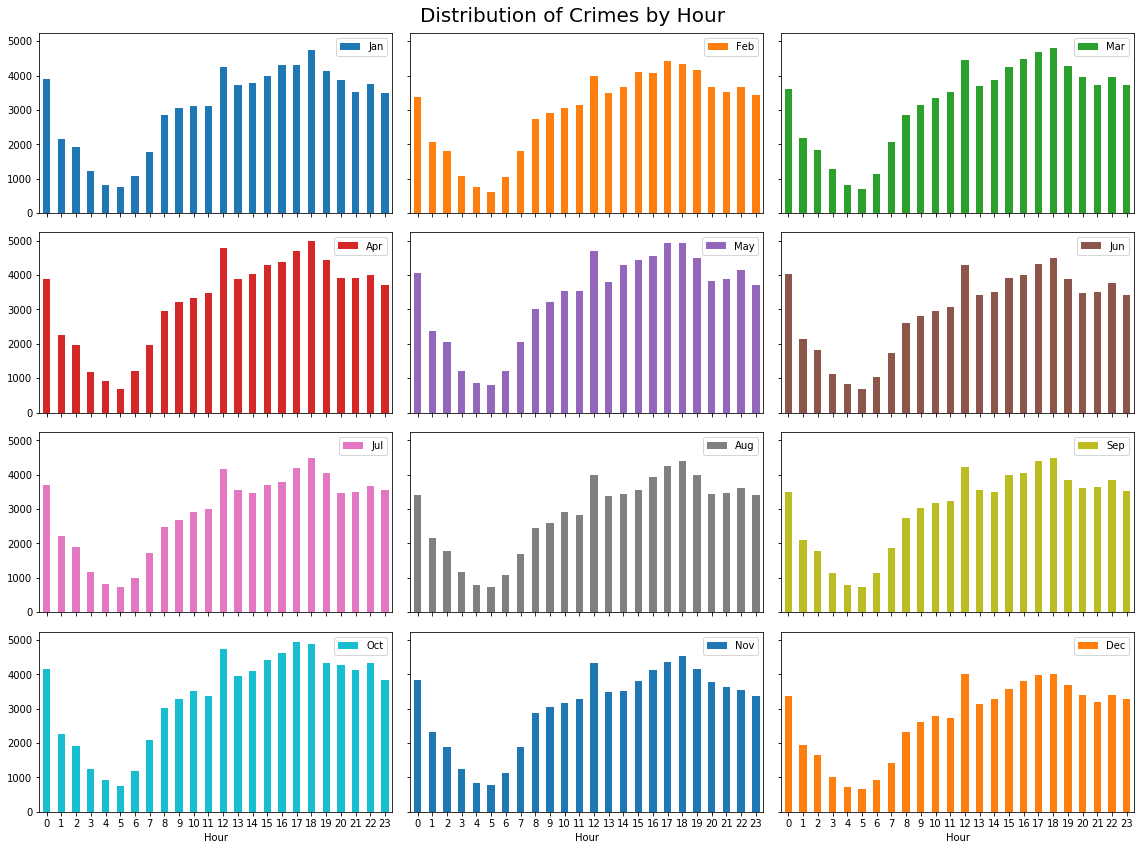

In [9]:
month_dict={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
data_month_hour = pd.crosstab(train['Hour'],train['Month'])
axhandles = data_month_hour.plot(kind='bar',subplots=True,layout=(4,3),figsize=(16,12),sharex=True,sharey=True,xticks=range(0,24,4),rot=0)
i=1
for axrow in axhandles:
    for ax in axrow:
        ax.set_xticklabels(range(0,24,1))
        ax.legend([month_dict[i]],loc='best')
        ax.set_title("")
        i+=1
plt.suptitle('Distribution of Crimes by Hour',size=20)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

## Data Analysis - Crimes by minute

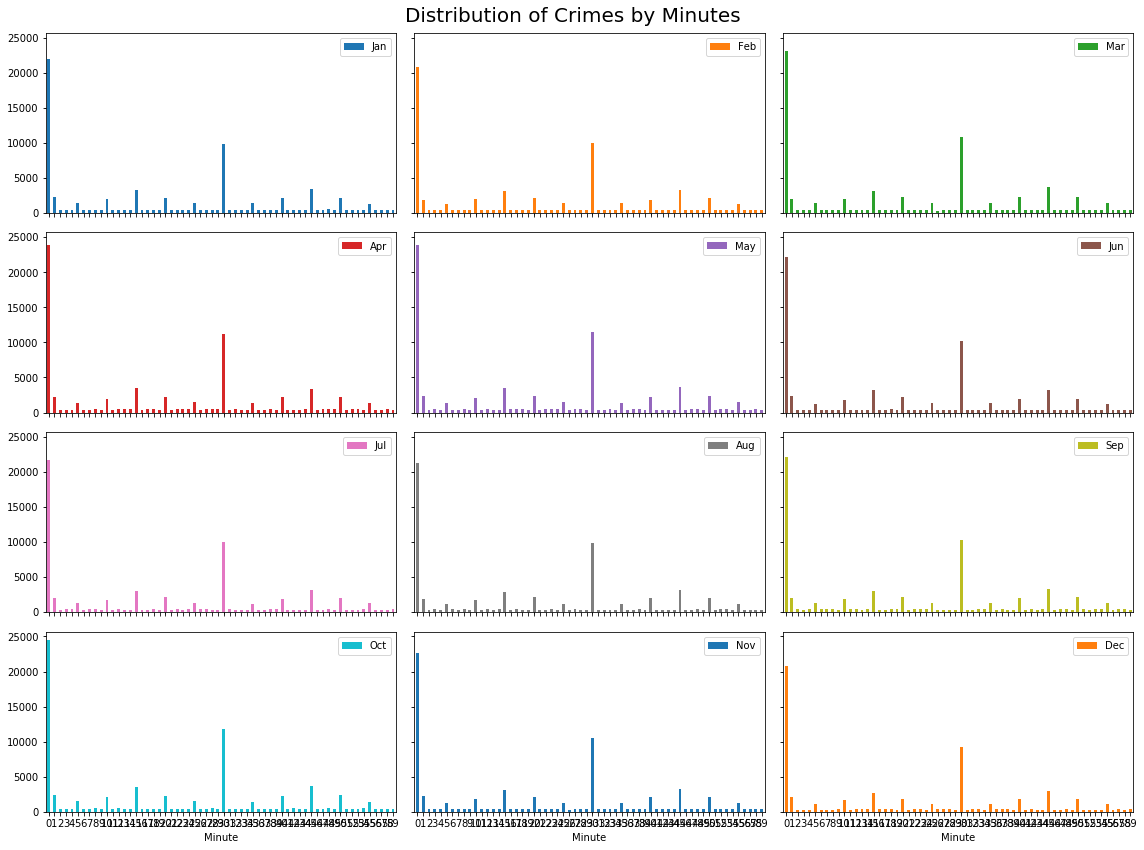

In [10]:
minute = train['Minute'].unique()
data_month_minute = pd.crosstab(train['Minute'], train['Month'])
axhandles=data_month_minute.plot(kind='bar',subplots=True,layout=(4,3),figsize=(16,12),sharex=True,sharey=True,xticks=range(0,60,4),rot=0)
i=1
for axrow in axhandles:
    for ax in axrow:
        ax.set_xticklabels(range(0,60,1))
        ax.legend([month_dict[i]],loc='best')
        ax.set_title("")
        i+=1
plt.suptitle('Distribution of Crimes by Minutes',size=20)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

## Data Analysis - Day of year

In [13]:
train = pd.read_csv("../data/train.csv", parse_dates=['Dates'])
train = train.drop(['Descript', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y'], axis=1)
train['DayOfYear'] = train['Dates'].map(lambda x: x.strftime("%m-%d"))
df = train[['Category','DayOfYear']].groupby(['DayOfYear']).count()
train.head()

,Dates,Category,DayOfWeek,DayOfYear
0,2015-05-13 23:53:00,WARRANTS,Wednesday,05-13
1,2015-05-13 23:53:00,OTHER OFFENSES,Wednesday,05-13
2,2015-05-13 23:33:00,OTHER OFFENSES,Wednesday,05-13
3,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,05-13
4,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,05-13


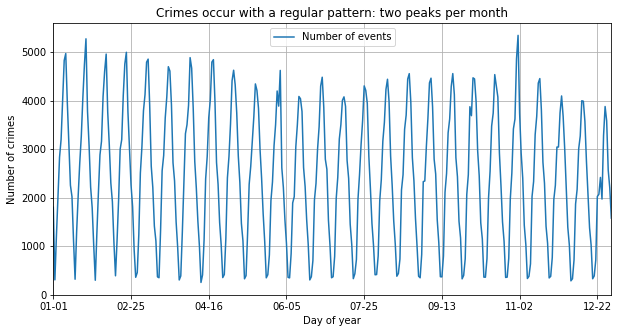

In [14]:
df.plot(y='Category', label='Number of events', figsize=(10,5)) 
plt.title("Crimes occur with a regular pattern: two peaks per month")
plt.ylabel('Number of crimes')
plt.xlabel('Day of year')
plt.grid(True)
plt.show()

## Prediction

In [26]:
from sklearn.cross_validation import cross_val_score

/Users/junyoung/.pyenv/versions/python3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [27]:
train.loc[train["Year"]==2015,"Year"] = 2014
train.loc[train["Minute"]!=(0|30),"Minute"] = 0
train.head()

,Dates,Category,DayOfWeek,Year,Month,Days,Hour,Minute,Second
0,2015-05-13 23:53:00,WARRANTS,Wednesday,2014,5,13,23,0,0
1,2015-05-13 23:53:00,OTHER OFFENSES,Wednesday,2014,5,13,23,0,0
2,2015-05-13 23:33:00,OTHER OFFENSES,Wednesday,2014,5,13,23,0,0
3,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,2014,5,13,23,30,0
4,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,2014,5,13,23,30,0


In [28]:
feature_names = ["Year", "Month", "Minute", "Days", "Hour"]
label_name = "Category"

train_X = train[feature_names]
train_y = train[label_name]

## Scoring

In [29]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

gaussian_score = cross_val_score(GaussianNB(), train_X, train_y, scoring='log_loss', cv=5).mean()
bernoulli_score = cross_val_score(BernoulliNB(), train_X, train_y, scoring='log_loss', cv=5).mean()

print("GaussianNB = {0:.6f}".format(-1.0 * gaussian_score))
# print("MultinomialNB = {0:.6f}".format(-1.0 * multimonial_score))
# print("BernoulliNB = {0:.6f}".format(-1.0 * bernoulli_score))

/Users/junyoung/.pyenv/versions/python3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/junyoung/.pyenv/versions/python3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/junyoung/.pyenv/versions/python3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/junyoung/.pyenv/versions/python3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/junyo

GaussianNB = 2.940873


## Test Results

### Before
- Year & Minute : 2.704256
- Hour & Minute : 2.633491
- Month & Days : 2.682305
- Days & Hour : 2.666096
- Year & Month & Days & Hour & Minute : 2.691690
 
### After
- Year & Minute : 2.973289 (+0.269033)
- Hour & Minute : 2.879516 (+0.246025)
- Year & Month & Days & Hour & Minute : 2.940873 (+0.249183)